## Simple CNN for Edgelovers
In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

### a) Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
def data_generation(number, x, y, bar_length, bar_number):
    data = np.zeros(shape=(number, x, y, 1))
    labels = np.zeros(shape=(number))
    for i in range(number):
        orientation = np.random.randint(0,2)
        image = np.random.random((x,y,1))*128
                      
        if orientation:
            label = 0.0
            for j in range(bar_number):
                x1 = np.random.randint(2, x)
                y1 = np.random.randint(2, y - 10)
                y2 = y1 + bar_length
                image[y1:y2, x1] = 255.0
        else:
            label = 1.0
            for j in range(bar_number):
                y1 = np.random.randint(2, x -10)
                x1 = np.random.randint(2, y)
                x2 = x1 + bar_length
                image[y1,x1:x2] = 255.0
        data[i] = image.copy()
        labels[i] = label
        return data, labels

In [5]:
train_data, train_label = data_generation(1000, 50,50, 10, 10)

In [6]:
val_data, val_label = data_generation(1000, 50,50, 10, 10)

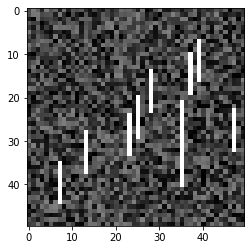

In [7]:
img = train_data[0, :, :, 0]
plt.imshow(img, cmap='gray')

### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have at max trainable 32 parameters in the network.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.

In [29]:
kernel = 2
epochs = 100
bs = 5
eta = 0.1

model = Sequential()
model.add(Conv2D(kernel, kernel_size=2, strides=2, activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(8, 8), strides=8, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="sgd", loss='mean_squared_error', lr=eta)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 25, 25, 2)         10        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 2)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 18)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 19        
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_label, batch_size=bs, epochs=epochs, validation_data=(val_data, val_label));

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.1985 - val_loss: 0.1540
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1263 - val_loss: 0.1016
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0866 - val_loss: 0.0722
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0637 - val_loss: 0.0545
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0494 - val_loss: 0.0431
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0399 - val_loss: 0.0352
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0333 - val_loss: 0.0296
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0284 - val_loss: 0.0254
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0247 - val_loss: 0.0222
Epoch 1

Epoch 78/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0029 - val_loss: 0.0019
Epoch 79/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0029 - val_loss: 0.0019
Epoch 80/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0029 - val_loss: 0.0019
Epoch 81/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0028 - val_loss: 0.0018
Epoch 82/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0028 - val_loss: 0.0018
Epoch 83/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0028 - val_loss: 0.0018
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0028 - val_loss: 0.0018
Epoch 85/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0027 - val_loss: 0.0017
Epoch 86/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0027 - val_loss: 0.0017
Epoch 87/100
1000/1000 [======================

### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use model.get_weights(). Does the learned kernel makes sense?